In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
import seaborn as sns
sns.set_style('whitegrid')

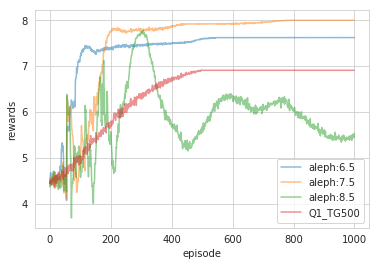

In [2]:
files = ["output/GRC/aleph_6.5.csv", "output/GRC/aleph_7.5.csv", 
        "output/GRC/aleph_8.5.csv", "output/Qshare/TG500_1_agents/agent_0.csv"]
# directory = os.listdir(path)
df = []
for file in files:
    # csvファイルを試験データを読込む
    df.append(pd.read_csv(file, encoding='shift_jis’').drop('Unnamed: 0', axis=1).mean(axis=1))
        
label = ["aleph:6.5", "aleph:7.5", "aleph:8.5", "Q1_TG500"]
for n in range(len(df)):
    plt.plot(df[n], label=label[n], alpha = 0.5)

plt.legend()
plt.xlabel("episode")
plt.ylabel("rewards")
plt.savefig("graph/fig3-1.png")
plt.show()


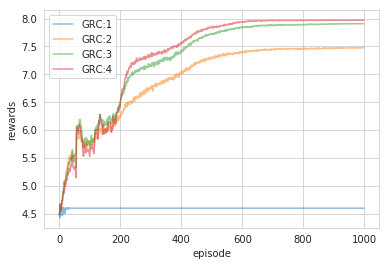

In [3]:
path = ["output/SocialSatisficing/" + str(n) +"_agents" for n in range(1, 5)]
df = []
for x in range(len(path)):
    df.append([])
    dict = os.listdir(path[x])
    for n in (dict):
        df[x].append(pd.read_csv(path[x]+"/"+n).drop('Unnamed: 0', axis=1))
        
for n in range(len(df)):
    df_sum = (sum(df[n])/len(df[n])).mean(axis=1)
    plt.plot(df_sum, label="GRC:{}" .format(n+1), alpha = 0.5)
plt.legend()
plt.xlabel("episode")
plt.ylabel("rewards")
plt.savefig("graph/fig3-2.png")
plt.show()


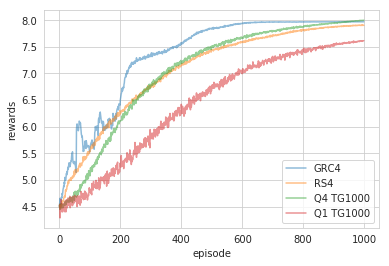

In [4]:
def proccesing(path, label):
    df = pd.DataFrame()
    files = glob.glob(path + '*.csv')
    n=0
    for file in files:
        # csvファイルを試験データを読込む
        df[n]=pd.read_csv(file, encoding='shift_jis’').drop('Unnamed: 0', axis=1).mean(axis=1)
        n+=1
    # df_sum = (sum(df)/len(df))
    label = label
    plt.plot(df.mean(axis=1), label=label, alpha = 0.5)

files = ["output/SocialSatisficing/4_agents/", "output/RSShare/4_agents/", 
        "output/Qshare/TG1000_4_agents/", "output/Qshare/TG1000_1_agents/"]
labels = ["GRC4", "RS4", "Q4 TG1000", "Q1 TG1000"]

for n in range(len(files)):
    proccesing(files[n], labels[n])

plt.legend()
plt.xlabel("episode")
plt.ylabel("rewards")
plt.savefig("graph/fig3-3.png")
plt.show()

(4, 1000, 1000)
(4, 1000, 1000)
(4, 1000, 1000)
(1, 1000, 1000)


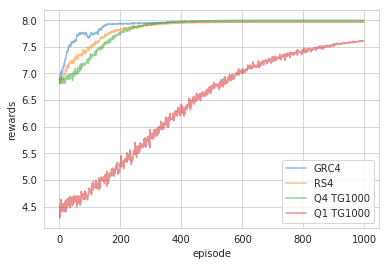

In [5]:
def proccesing(path, label):
    df = pd.DataFrame()
    files = glob.glob(path + '*.csv')
    n=0
    df = []
    for file in files:
        # csvファイルを試験データを読込む
        df.append(pd.read_csv(file, encoding='shift_jis’').drop('Unnamed: 0', axis=1).values.T)
    # df_sum = (sum(df)/len(df))

    df = np.asarray(df)
    print(df.shape)
    df = df.max(axis=0)
    df = df.mean(axis=0)
    label = label
    plt.plot(df, label=label, alpha = 0.5)

files = ["output/SocialSatisficing/4_agents/", "output/RSShare/4_agents/", 
        "output/Qshare/TG1000_4_agents/", "output/Qshare/TG1000_1_agents/"]
labels = ["GRC4", "RS4", "Q4 TG1000", "Q1 TG1000"]

for n in range(len(files)):
    proccesing(files[n], labels[n])


plt.legend()
plt.xlabel("episode")
plt.ylabel("rewards")
plt.savefig("graph/fig3-4.png")
plt.show()


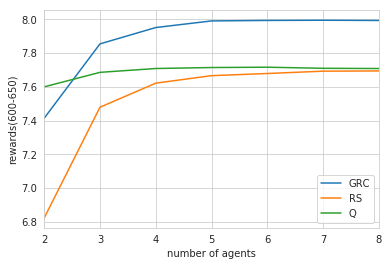

In [6]:

def proccesing(algo):
    data = pd.DataFrame()
    for n in range(2, 9):
        path = "output/"+algo+"/"+str(n)+"_agents/"
        files = glob.glob(path + '*.csv')
        df = []
        for file in files:
            # csvファイルを試験データを読込む
            df.append(pd.read_csv(file, encoding='shift_jis’').drop('Unnamed: 0', axis=1).mean(axis=1))
        df = pd.DataFrame(np.asarray(df).mean(axis=0))

        data[n] = df[599:650].mean()
#     print(data.values)
    return data.values[0]

def proccesingQ(algo):
    data = pd.DataFrame()
    for n in range(2, 9):
        path = "output/"+algo+"/TG1000_"+str(n)+"_agents/"
        files = glob.glob(path + '*.csv')
        df = []
        for file in files:
            # csvファイルを試験データを読込む
            df.append(pd.read_csv(file, encoding='shift_jis’').drop('Unnamed: 0', axis=1).mean(axis=1))
        df = pd.DataFrame(np.asarray(df).mean(axis=0))

        data[n] = df[599:650].mean()
#     print(data.values)
    return data.values[0]

data = pd.DataFrame()
data["GRC"] = proccesing("SocialSatisficing")
data["RS"]=proccesing("RSShare")
data["Q"]=proccesingQ("Qshare")
data["n_agent"] = [n for n in range(2,9)]
data.set_index("n_agent", inplace=True)
data.plot()
plt.xlabel("number of agents")
plt.ylabel("rewards(600-650)")
plt.savefig("graph/fig4-1.png")

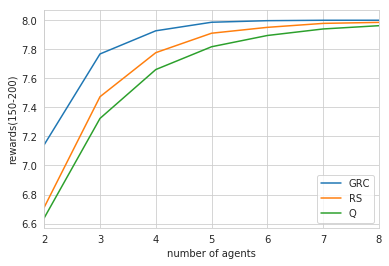

In [7]:

def proccesing(algo):
    data = pd.DataFrame()
    for n in range(2, 9):
        path = "output/"+algo+"/"+str(n)+"_agents/"
        files = glob.glob(path + '*.csv')
        df = []
        for file in files:
            # csvファイルを試験データを読込む
            df.append(pd.read_csv(file, encoding='shift_jis’').drop('Unnamed: 0', axis=1).values.T)
        df = np.asarray(df).max(axis=0)
        df = pd.DataFrame(np.asarray(df).mean(axis=0))

        data[n] = df[149:200].mean()
#     print(data.values)
    return data.values[0]

def proccesingQ(algo):
    data = pd.DataFrame()
    for n in range(2, 9):
        path = "output/"+algo+"/TG1000_"+str(n)+"_agents/"
        files = glob.glob(path + '*.csv')
        df = []
        for file in files:
            # csvファイルを試験データを読込む
            df.append(pd.read_csv(file, encoding='shift_jis’').drop('Unnamed: 0', axis=1).values.T)
        df = np.asarray(df).max(axis=0)
        df = pd.DataFrame(np.asarray(df).mean(axis=0))

        data[n] = df[149:200].mean()
#     print(data.values)
    return data.values[0]

data = pd.DataFrame()
data["GRC"] = proccesing("SocialSatisficing")
data["RS"]=proccesing("RSShare")
data["Q"]=proccesingQ("Qshare")
data["n_agent"] = [n for n in range(2,9)]
data.set_index("n_agent", inplace=True)
data.plot()
plt.xlabel("number of agents")
plt.ylabel("rewards(150-200)")
plt.savefig("graph/fig4-2.png")

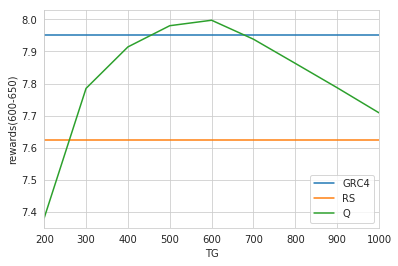

In [8]:
def proccesing(algo):
    path = "output/"+algo+"/4_agents/"
    df = pd.DataFrame()
    files = glob.glob(path + '*.csv')
    n=0
    df = []
    for file in files:
        # csvファイルを試験データを読込む
        df.append(pd.read_csv(file, encoding='shift_jis’').drop('Unnamed: 0', axis=1)[600:651].mean(axis=1).mean())
    # df_sum = (sum(df)/len(df))

    df = np.asarray(df).mean()
#     print()
#     df = df.max(axis=0)
    return pd.Series([df.tolist()]*9)

def proccesing2(algo):
    data = pd.DataFrame()
    m=0
    
    for n in range(200, 1100, 100):
        # df = []
        df = pd.DataFrame()
        path = "output/"+algo+"/TG"+str(n)+"_4_agents/"
        files = glob.glob(path + '*.csv')
        for file in files:
            df[file] = pd.read_csv(file, encoding='shift_jis’').drop('Unnamed: 0', axis=1).mean(axis=1).values
        m+=1
        df = pd.DataFrame(np.asarray(df).mean(axis=1))
        data[m] = df[599:650].mean()
    return data.values[0]

# def proccesingQ(algo):
#     data = pd.DataFrame()
    
#     for n in range(200, 1100, 100):
        
#         path = "output/"+algo+"/TG"+str(n)+"_4_agents/"
#         files = glob.glob(path + '*.csv')
#         array = np.empty([len(files), 1000, 1000])
#         for m in range(len(files)):
#             # csvファイルを試験データを読込む
#             array[m] = pd.read_csv(files[m], encoding='shift_jis’').drop('Unnamed: 0', axis=1).values
#         array = array.mean(axis=0).mean(axis=0)
#         df = pd.DataFrame(array.T)
#         # print(df)
#         data[n] = df[599:650].mean()
#     # print(data)
#     return data.values[0]

data = pd.DataFrame()
data["GRC4"] = proccesing("SocialSatisficing")
data["RS"]=proccesing("RSShare")
data["Q"]=proccesing2("Qshare")
data.set_axis([n for n in range(200, 1100, 100)], axis = "index", inplace=True)
data.plot()
plt.xlabel("TG")
plt.ylabel("rewards(600-650)")
plt.savefig("graph/fig4-3.png")

          0         1         2         3         4         5         6  \
0  7.443294  7.719176  7.821137  7.857804  7.869059  7.856431  7.855627   

          7         8  
0  7.841667  7.827784  
0    7.443294
1    7.719176
2    7.821137
3    7.857804
4    7.869059
5    7.856431
6    7.855627
7    7.841667
8    7.827784
Name: Q, dtype: float64


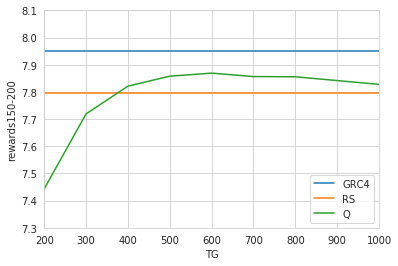

In [9]:
def proccesing(algo):
    path = "output/"+algo+"/4_agents/"
    df = pd.DataFrame()
    files = glob.glob(path + '*.csv')
    n=0
    df = []
    for file in files:
        # csvファイルを試験データを読込む
        df.append(pd.read_csv(file, encoding='shift_jis’').drop('Unnamed: 0', axis=1)[149:199].max(axis=0))
    # df_sum = (sum(df)/len(df))
#     print(df)
    df = np.asarray(df).mean()
#     print()
#     df = df.max(axis=0)
    return pd.Series([df.tolist()]*9)

# def proccesing2(algo):
#     data = pd.DataFrame()
#     m=0
    
#     for n in range(200, 1100, 100):
#         # df = []
#         df = pd.DataFrame()
#         path = "output/"+algo+"/TG"+str(n)+"_4_agents/"
#         files = glob.glob(path + '*.csv')
#         for file in files:
#             df[file] = pd.read_csv(file, encoding='shift_jis’').drop('Unnamed: 0', axis=1).max(axis=1).values
#         m+=1
#         df = pd.DataFrame(np.asarray(df).mean(axis=1))
#         data[m] = df[149:200].mean()
#     return data.values[0]

def proccesingQ(algo):
    data = pd.DataFrame()
    m=0
    for n in range(200, 1100, 100): 
        path = "output/"+algo+"/TG"+str(n)+"_4_agents/"
        files = glob.glob(path + '*.csv')
        array = np.empty([len(files), 1000, 1000])
        for n in range(len(files)):
            # csvファイルを試験データを読込む
            array[n] = pd.read_csv(files[n], encoding='shift_jis’').drop('Unnamed: 0', axis=1).values
        # print(array.shape)
        array = array.max(axis=0).mean(axis=0)
        # print(array.shape)
        df = pd.DataFrame(array.T)
        data[m] = df[149:200].mean()
        m+=1
    print(data)
    return data.values[0]

data = pd.DataFrame()
data["GRC4"] = proccesing("SocialSatisficing")
data["RS"]=proccesing("RSShare")
data["Q"]=proccesingQ("Qshare")
print(data["Q"])
data.set_axis([n for n in range(200, 1100, 100)], axis = "index", inplace=True)
data.plot(ylim=[7.3, 8.1])
plt.xlabel("TG")
plt.ylabel("rewards150-200")
plt.savefig("graph/fig4-4.png")

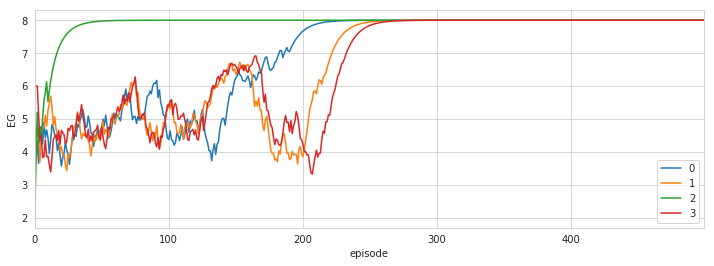

In [10]:
path = "output/SocialSatisficing/EG/4_agents/"
files = glob.glob(path + '*.csv')
df = []
for file in files:
    # csvファイルを試験データを読込む
    df.append(pd.read_csv(file, encoding='shift_jis’').drop('Unnamed: 0', axis=1)[0:500].T.values[0])

pd.DataFrame(df).T.plot(figsize=(12,4))
plt.xlabel("episode")
plt.ylabel("EG")
plt.savefig("graph/fig5-1.png")

In [11]:
# path = "output/SocialSatisficing/4_agents/"
# files = glob.glob(path + '*.csv')
# df = []
# for file in files:
#     # csvファイルを試験データを読込む
#     df.append(pd.read_csv(file, encoding='shift_jis’').drop('Unnamed: 0', axis=1).T.values.mean(axis=0))
# data = pd.DataFrame(np.asarray(df).T.mean(axis=1))
# print(data)
# data.pct_change().plot()